In [0]:
import os, shutil
import numpy as np

from matplotlib import image, pyplot
from skimage.transform import resize


from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

from keras import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, f1_score, recall_score,classification_report,roc_curve, auc 
from sklearn.utils import class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm


In [0]:
resultPath = '/content/drive/My Drive/Research/Image Spam/Results/image_spam_hunter/CNN'
train_folder = os.listdir(DATA_PATH).remove("New_Spam")

In [5]:
DATA_PATH = '/content/drive/My Drive/Research/Image Spam/Dataset/image_spam_hunter/'
spamData=[]
label=[]
hashList=[]
count=-1
for folder in os.listdir(DATA_PATH):
    if folder=="New_Spam":
      continue;
    print(">>>Reading ",folder)
    count+=1
    
    for file in os.listdir(DATA_PATH+folder):
        if(str(file).endswith('.jpg') or str(file).endswith('.JPG') or str(file).endswith('.jpeg') or str(file).endswith('.JPEG')):
            img = image.imread(DATA_PATH+folder+'/'+file)
            hsh = hash(tuple(np.array(img).flatten()))
            if(hsh not in hashList):
              spamData.append(resize(img, (156, 156, 3)))
              hashList.append(hsh)
              label.append(count)
spamData=np.array(spamData)
label=np.array(label)

>>>Reading  SpamImages
>>>Reading  NaturalImages
>>>Reading  New_Spam


In [10]:
print("Number of SPAM",len(label[label==0]))
print("Number of HAM",len(label[label==1]))

Number of SPAM 897
Number of HAM 810


In [11]:
print("Spam data shape : ",spamData.shape," Label shape : ",label.shape)

Spam data shape :  (1707, 156, 156, 3)  Label shape :  (1707,)


In [0]:
test_valid_Percentage = 0.3
x_train,x_test,y_train,y_test = train_test_split(spamData,label,test_size = testPercentage,random_state=42, stratify=label,shuffle=True)

In [13]:
print("x_train shape : ",x_train.shape," y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape," y_test shape : ",y_test.shape)

x_train shape :  (1194, 156, 156, 3)  y_train shape :  (1194,)
x_test shape :  (513, 156, 156, 3)  y_test shape :  (513,)


In [15]:
print("Number of train SPAM",len(y_train[y_train==0]))
print("Number of train HAM",len(y_train[y_train==1]))

print("Number of test SPAM",len(y_test[y_test==0]))
print("Number of test HAM",len(y_test[y_test==1]))

Number of train SPAM 627
Number of train HAM 567
Number of test SPAM 270
Number of test HAM 243


In [16]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print("y_train_oh shape : ",y_train_oh.shape," y_test_oh shape : ",y_test_oh.shape)

y_train_oh shape :  (1194, 2)  y_test_oh shape :  (513, 2)


In [18]:
NO_OF_EPOCHS=100
BATCH_SIZE=32

model=Sequential()
model.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 156, 156, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 78, 78, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 78, 78, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 39, 39, 128)       73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 39, 39, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 194688)           

In [20]:
checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger(resultPath+'/result_logger.csv',separator=',', append=False)
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model.fit(x_train,y_train,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),callbacks=[checkpointer,csv_logger,reduce_lr])




Train on 1194 samples, validate on 513 samples
Epoch 1/100





1194/1194 [==============================] - 13s 11ms/step - loss: 0.4608 - acc: 0.8610 - val_loss: 0.2648 - val_acc: 0.8967

Epoch 00001: val_acc improved from -inf to 0.89669, saving model to /content/drive/My Drive/Research/Image Spam/Results/image_spam_hunter/CNN/checkpoint-0001.hdf5
Epoch 2/100
1194/1194 [==============================] - 4s 4ms/step - loss: 0.1714 - acc: 0.9389 - val_loss: 0.1779 - val_acc: 0.9493

Epoch 00002: val_acc improved from 0.89669 to 0.94932, saving model to /content/drive/My Drive/Research/Image Spam/Results/image_spam_hunter/CNN/checkpoint-0002.hdf5
Epoch 3/100
1194/1194 [==============================] - 5s 4ms/step - loss: 0.0753 - acc: 0.9732 - val_loss: 0.1274 - val_acc: 0.9571

Epoch 00003: val_acc improved from 0.94932 to 0.95712, saving model to /content/drive/My Drive/Research/Image Spam/Results/image_spam_hunter/CNN/checkpoint-0003.hdf5
Epoch 4/100
1194/1194 [=================

In [0]:
  model.load_weights(resultPath+"/checkpoint-0099.hdf5")

In [60]:
prediction_prob1 = model.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob1)

513/513 [==============================] - 1s 1ms/step


In [61]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9707602339181286
0.9596774193548387
0.9794238683127572
0.9694501018329938
[[260  10]
 [  5 238]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       270
           1       0.96      0.98      0.97       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513



In [50]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[0.95215311 1.05291005]


In [51]:
model1=Sequential()
model1.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 156, 156, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 78, 78, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 78, 78, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 39, 39, 128)       73856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 39, 39, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 194688)           

In [55]:
checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/csl/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger(resultPath+'/csl/result_logger.csv',separator=',', append=False)
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model1.fit(x_train,y_train,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,class_weight=class_weights,validation_data=(x_test,y_test),callbacks=[checkpointer,csv_logger,reduce_lr])

Train on 1194 samples, validate on 513 samples
Epoch 1/100
1194/1194 [==============================] - 6s 5ms/step - loss: 0.6316 - acc: 0.8023 - val_loss: 0.2674 - val_acc: 0.9064

Epoch 00001: val_acc improved from -inf to 0.90643, saving model to /content/drive/My Drive/Research/Image Spam/Results/image_spam_hunter/CNN/csl/checkpoint-0001.hdf5
Epoch 2/100
1194/1194 [==============================] - 5s 4ms/step - loss: 0.1978 - acc: 0.9288 - val_loss: 0.2164 - val_acc: 0.9142

Epoch 00002: val_acc improved from 0.90643 to 0.91423, saving model to /content/drive/My Drive/Research/Image Spam/Results/image_spam_hunter/CNN/csl/checkpoint-0002.hdf5
Epoch 3/100
1194/1194 [==============================] - 5s 4ms/step - loss: 0.1338 - acc: 0.9489 - val_loss: 0.1734 - val_acc: 0.9474

Epoch 00003: val_acc improved from 0.91423 to 0.94737, saving model to /content/drive/My Drive/Research/Image Spam/Results/image_spam_hunter/CNN/csl/checkpoint-0003.hdf5
Epoch 4/100
1194/1194 [===============

In [0]:
model1.load_weights(resultPath+"/csl/checkpoint-0007.hdf5")

In [57]:
prediction_prob = model1.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob)

513/513 [==============================] - 1s 1ms/step


In [58]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9746588693957114
0.9831932773109243
0.9629629629629629
0.9729729729729729
[[266   4]
 [  9 234]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       270
           1       0.98      0.96      0.97       243

    accuracy                           0.97       513
   macro avg       0.98      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513



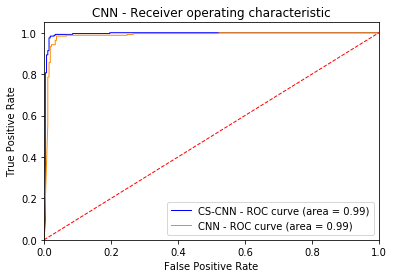

In [67]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])


pyplot.figure()
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CS-CNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction_prob1)
    roc_auc[i] = auc(fpr[i], tpr[i])
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CNN - ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
plt.legend(loc="lower right")
pyplot.show()

In [0]:
m1model = Model(inputs=model.input,outputs=model.get_layer('dense_3').output)
m2model = Model(inputs=model1.input,outputs=model1.get_layer('dense_5').output)

In [73]:
m1_x_train = m1model.predict(x_train,verbose=1)
m1_x_test = m1model.predict(x_test,verbose=1)

m2_x_train = m2model.predict(x_train,verbose=1)
m2_x_test = m2model.predict(x_test,verbose=1)

513/513 [==============================] - 1s 1ms/step


In [74]:
print("Shape of model1 Train and Test DF : ",m1_x_train.shape," : ",m1_x_test.shape)
print("Shape of model2 Train and Test DF : ",m2_x_train.shape," : ",m2_x_test.shape)

Shape of model1 Train and Test DF :  (1194, 128)  :  (513, 128)
Shape of model2 Train and Test DF :  (1194, 128)  :  (513, 128)


In [0]:
def printMetrics(true,pred):
    print("Accuracy : ",accuracy_score(true, pred))
    print("Precision",precision_score(true, pred , average="weighted"))
    print("Recall : ",recall_score(true, pred , average="weighted"))
    print("F1-score : ",f1_score(true, pred, average="weighted"))
    print("Confusion Matrix : ")
    print(confusion_matrix(true, pred))
    print(classification_report(true,pred))

In [100]:
LR = LogisticRegression()
LR.fit(m1_x_train, y_train)
LRprob = LR.predict_proba(m1_x_test)
y_pred = LR.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LR = LogisticRegression()
LR.fit(m2_x_train, y_train)
CS_LRprob = LR.predict_proba(m2_x_test)
y_pred = LR.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9688109161793372
Precision 0.9688523013290155
Recall :  0.9688109161793372
F1-score :  0.9688168559615872
Confusion Matrix : 
[[261   9]
 [  7 236]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       270
           1       0.96      0.97      0.97       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513

cost-sensitive
Accuracy :  0.9746588693957114
Precision 0.9746713132395252
Recall :  0.9746588693957114
F1-score :  0.9746613794412964
Confusion Matrix : 
[[263   7]
 [  6 237]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       270
           1       0.97      0.98      0.97       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
RF = RandomForestClassifier()
RF.fit(m1_x_train, y_train)
RFprob = RF.predict_proba(m1_x_test)
y_pred = RF.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

RF = RandomForestClassifier()
RF.fit(m2_x_train, y_train)
CS_RFprob = RF.predict_proba(m2_x_test)
y_pred = RF.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9668615984405458
Precision 0.9668618956741981
Recall :  0.9668615984405458
F1-score :  0.9668580621284713
Confusion Matrix : 
[[262   8]
 [  9 234]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       270
           1       0.97      0.96      0.96       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513

cost-sensitive
Accuracy :  0.9785575048732943
Precision 0.9786099865047233
Recall :  0.9785575048732943
F1-score :  0.9785501466854741
Confusion Matrix : 
[[266   4]
 [  7 236]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       270
           1       0.98      0.97      0.98       243

    accuracy                           0.98       513
   macro avg       0.98      0.98      0.98       513
weighted avg       0.98      0.98      0.98

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [115]:
DT = DecisionTreeClassifier()
DT.fit(m1_x_train, y_train)
DTprob = DT.predict_proba(m1_x_test)
y_pred = DT.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

DT = DecisionTreeClassifier()
DT.fit(m2_x_train, y_train)
CS_DTprob = DT.predict_proba(m2_x_test)
y_pred = DT.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9668615984405458
Precision 0.9668755272299219
Recall :  0.9668615984405458
F1-score :  0.9668648808078492
Confusion Matrix : 
[[261   9]
 [  8 235]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       270
           1       0.96      0.97      0.97       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513

cost-sensitive
Accuracy :  0.9688109161793372
Precision 0.9689507168731545
Recall :  0.9688109161793372
F1-score :  0.9688218413838434
Confusion Matrix : 
[[260  10]
 [  6 237]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       270
           1       0.96      0.98      0.97       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97

In [116]:

KNN = KNeighborsClassifier()
KNN.fit(m1_x_train, y_train)
KNNprob = KNN.predict_proba(m1_x_test)
y_pred = KNN.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

KNN = KNeighborsClassifier()
KNN.fit(m2_x_train, y_train)
CS_KNNprob = KNN.predict_proba(m2_x_test)
y_pred = KNN.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9649122807017544
Precision 0.9649122807017544
Recall :  0.9649122807017544
F1-score :  0.9649122807017544
Confusion Matrix : 
[[261   9]
 [  9 234]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       270
           1       0.96      0.96      0.96       243

    accuracy                           0.96       513
   macro avg       0.96      0.96      0.96       513
weighted avg       0.96      0.96      0.96       513

cost-sensitive
Accuracy :  0.9805068226120858
Precision 0.9805281142813099
Recall :  0.9805068226120858
F1-score :  0.9805025127241268
Confusion Matrix : 
[[266   4]
 [  6 237]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       270
           1       0.98      0.98      0.98       243

    accuracy                           0.98       513
   macro avg       0.98      0.98      0.98       513
weighted avg       0.98      0.98      0.98

In [117]:

GNB = GaussianNB()
GNB.fit(m1_x_train, y_train)
GNBprob = GNB.predict_proba(m1_x_test)
y_pred = GNB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

GNB = GaussianNB()
GNB.fit(m2_x_train, y_train)
CS_GNBprob = GNB.predict_proba(m2_x_test)
y_pred = GNB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9668615984405458
Precision 0.9669052438789281
Recall :  0.9668615984405458
F1-score :  0.966850226695733
Confusion Matrix : 
[[263   7]
 [ 10 233]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       270
           1       0.97      0.96      0.96       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513

cost-sensitive
Accuracy :  0.9668615984405458
Precision 0.9670057496682885
Recall :  0.9668615984405458
F1-score :  0.9668413724425312
Confusion Matrix : 
[[264   6]
 [ 11 232]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       270
           1       0.97      0.95      0.96       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97 

In [118]:
AB = AdaBoostClassifier()
AB.fit(m1_x_train, y_train)
ABprob = AB.predict_proba(m1_x_test)
y_pred = AB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

AB = AdaBoostClassifier()
AB.fit(m2_x_train, y_train)
CS_ABprob = AB.predict_proba(m2_x_test)
y_pred = AB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9746588693957114
Precision 0.9746713132395252
Recall :  0.9746588693957114
F1-score :  0.9746613794412964
Confusion Matrix : 
[[263   7]
 [  6 237]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       270
           1       0.97      0.98      0.97       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513

cost-sensitive
Accuracy :  0.9785575048732943
Precision 0.978560388039722
Recall :  0.9785575048732943
F1-score :  0.9785552166713638
Confusion Matrix : 
[[265   5]
 [  6 237]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       270
           1       0.98      0.98      0.98       243

    accuracy                           0.98       513
   macro avg       0.98      0.98      0.98       513
weighted avg       0.98      0.98      0.98 

In [120]:
LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m1_x_train, y_train)
LSVMprob = LSVM.predict_proba(m1_x_test)
y_pred = LSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m2_x_train, y_train)
CS_LSVMprob = LSVM.predict_proba(m2_x_test)
y_pred = LSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9688109161793372
Precision 0.9688523013290155
Recall :  0.9688109161793372
F1-score :  0.9688168559615872
Confusion Matrix : 
[[261   9]
 [  7 236]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       270
           1       0.96      0.97      0.97       243

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513

cost-sensitive
Accuracy :  0.9805068226120858
Precision 0.9805068226120858
Recall :  0.9805068226120858
F1-score :  0.9805068226120858
Confusion Matrix : 
[[265   5]
 [  5 238]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       270
           1       0.98      0.98      0.98       243

    accuracy                           0.98       513
   macro avg       0.98      0.98      0.98       513
weighted avg       0.98      0.98      0.98

In [122]:
RSVM = svm.SVC(kernel='rbf',probability=True)
RSVM.fit(m1_x_train, y_train)
RSVMprob = RSVM.predict_proba(m1_x_test)
y_pred = RSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

RSVM = svm.SVC(kernel='linear',probability=True)
RSVM.fit(m2_x_train, y_train)
CS_RSVMprob = RSVM.predict_proba(m2_x_test)
y_pred = RSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


cost-insensitive
Accuracy :  0.9532163742690059
Precision 0.9540013761981726
Recall :  0.9532163742690059
F1-score :  0.9532466284396324
Confusion Matrix : 
[[253  17]
 [  7 236]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       270
           1       0.93      0.97      0.95       243

    accuracy                           0.95       513
   macro avg       0.95      0.95      0.95       513
weighted avg       0.95      0.95      0.95       513

cost-sensitive
Accuracy :  0.9805068226120858
Precision 0.9805068226120858
Recall :  0.9805068226120858
F1-score :  0.9805068226120858
Confusion Matrix : 
[[265   5]
 [  5 238]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       270
           1       0.98      0.98      0.98       243

    accuracy                           0.98       513
   macro avg       0.98      0.98      0.98       513
weighted avg       0.98      0.98      0.98

In [0]:
SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

pyplot.rc('font', size=SMALL_SIZE)          # controls default text sizes
pyplot.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pyplot.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
pyplot.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
pyplot.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

def rocinfo(pred):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(2):
      fpr[i], tpr[i], _ = roc_curve(y_test, pred)
      roc_auc[i] = auc(fpr[i], tpr[i])
  return fpr,tpr,roc_auc

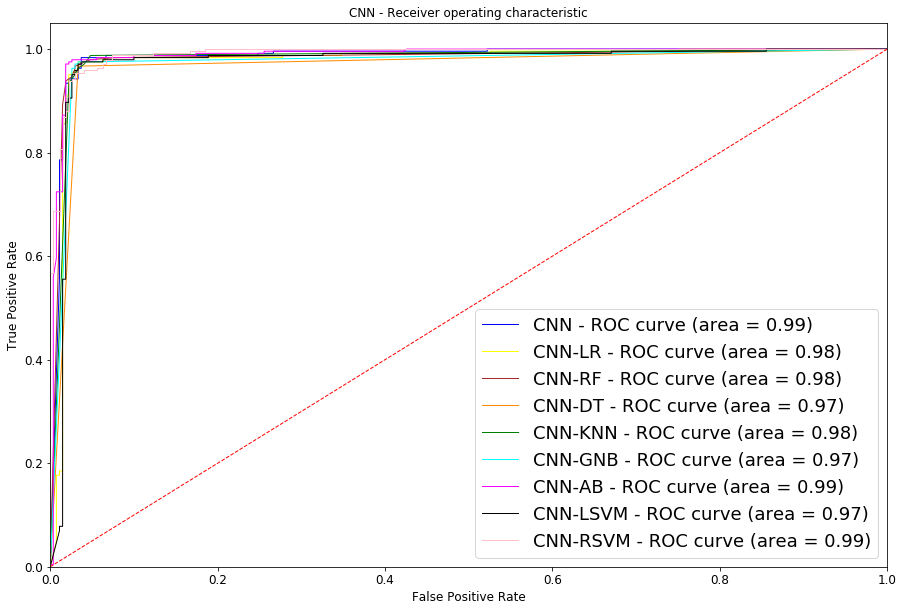

In [130]:
pyplot.figure(figsize=(15,10))

fpr,tpr,roc_auc = rocinfo(prediction_prob1) 
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(LRprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='yellow', lw=1, label='CNN-LR - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(RFprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='brown', lw=1, label='CNN-RF - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(DTprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CNN-DT - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(KNNprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='green', lw=1, label='CNN-KNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(GNBprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='cyan', lw=1, label='CNN-GNB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(ABprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='magenta', lw=1, label='CNN-AB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(LSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='black', lw=1, label='CNN-LSVM - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(RSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='pink', lw=1, label='CNN-RSVM - ROC curve (area = %0.2f)' % roc_auc[0])

plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
plt.legend(loc="lower right")
pyplot.show()

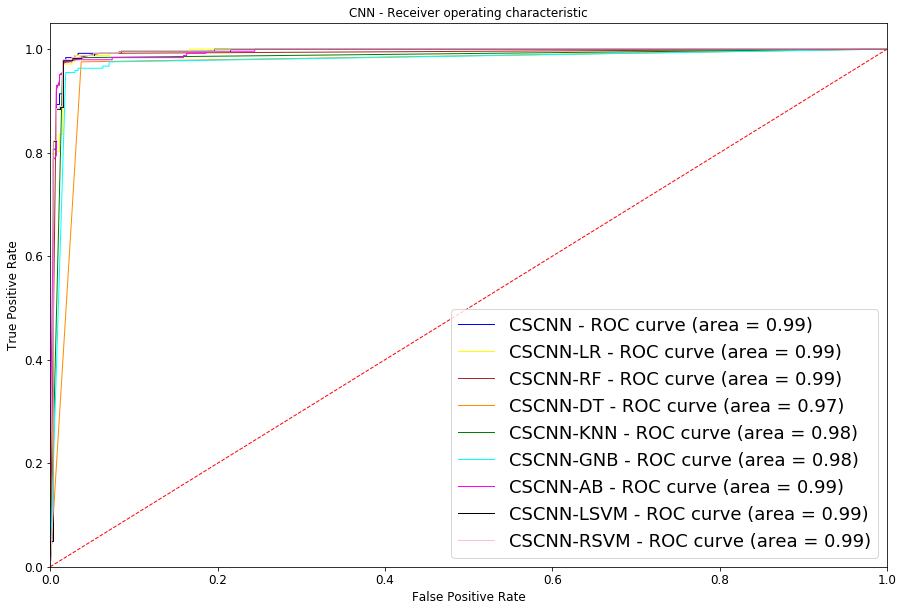

In [132]:
pyplot.figure(figsize=(15,10))

fpr,tpr,roc_auc = rocinfo(prediction_prob) 
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CSCNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_LRprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='yellow', lw=1, label='CSCNN-LR - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_RFprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='brown', lw=1, label='CSCNN-RF - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_DTprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CSCNN-DT - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_KNNprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='green', lw=1, label='CSCNN-KNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_GNBprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='cyan', lw=1, label='CSCNN-GNB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_ABprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='magenta', lw=1, label='CSCNN-AB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_LSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='black', lw=1, label='CSCNN-LSVM - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_RSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='pink', lw=1, label='CSCNN-RSVM - ROC curve (area = %0.2f)' % roc_auc[0])

plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
plt.legend(loc="lower right")
pyplot.show()